In [5]:

!pip install mlxtend
import pandas as pd
import numpy as np
import os
import sklearn.preprocessing
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:


#Load the dataset

df = pd.read_excel('/content/Online retail.xlsx')


#Display all sheet names
sheet_names = pd.ExcelFile('/content/Online retail.xlsx').sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Sheet1']


DATA PREPROCESSING

In [8]:
import pandas as pd
import numpy as np
import os
import sklearn.preprocessing
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [9]:
df = pd.DataFrame(df)

In [11]:
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [12]:
print(df.head())

  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

In [13]:
print(df.tail())

     shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7495                      butter,light mayo,fresh bread                                                                                                                                                                             
7496  burgers,frozen vegetables,eggs,french fries,ma...                                                                                                                                                                             
7497                                            chicken                                                                                                                                                                             
7498                                 escalope,green tea                             

In [14]:
print(df.shape)

(7500, 1)


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB
None


In [16]:
print(df.describe())

       shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
count                                                7500                                                                                                                                                                             
unique                                               5175                                                                                                                                                                             
top                                               cookies                                                                                                                                                                             
freq                                                  223                   

In [17]:
print(df.columns)

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


In [18]:
#Missing values
df.isnull().sum()

,0
"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil",0


In [19]:
#remove duplicates
df.drop_duplicates()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7492,"burgers,salmon,pancakes,french fries,frozen sm..."
7493,"turkey,burgers,dessert wine,shrimp,pasta,tomat..."
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."


In [20]:

df.columns = ['almond']
groupby = df.groupby(['almond'])
groupby.first()

""
almond
almonds
"almonds,cake,low fat yogurt"
"almonds,cookies"
"almonds,eggs"
"almonds,eggs,cookies"
...
"yogurt cake,candy bars"
"yogurt cake,energy drink"
"yogurt cake,honey"


In [21]:
groupby = df.groupby(['almond'])
grouped_data = groupby.first()
# Reset the index to make 'items' a column again
grouped_data = grouped_data.reset_index()
transactions = grouped_data['almond'].apply(list)
transactions

,almond
0,"[a, l, m, o, n, d, s]"
1,"[a, l, m, o, n, d, s, ,, c, a, k, e, ,, l, o, ..."
2,"[a, l, m, o, n, d, s, ,, c, o, o, k, i, e, s]"
3,"[a, l, m, o, n, d, s, ,, e, g, g, s]"
4,"[a, l, m, o, n, d, s, ,, e, g, g, s, ,, c, o, ..."
...,...
5170,"[y, o, g, u, r, t, , c, a, k, e, ,, c, a, n, ..."
5171,"[y, o, g, u, r, t, , c, a, k, e, ,, e, n, e, ..."
5172,"[y, o, g, u, r, t, , c, a, k, e, ,, h, o, n, ..."
5173,"[y, o, g, u, r, t, , c, a, k, e, ,, l, o, w, ..."


In [22]:
df_transformed = pd.DataFrame(transactions)
df_transformed

,almond
0,"[a, l, m, o, n, d, s]"
1,"[a, l, m, o, n, d, s, ,, c, a, k, e, ,, l, o, ..."
2,"[a, l, m, o, n, d, s, ,, c, o, o, k, i, e, s]"
3,"[a, l, m, o, n, d, s, ,, e, g, g, s]"
4,"[a, l, m, o, n, d, s, ,, e, g, g, s, ,, c, o, ..."
...,...
5170,"[y, o, g, u, r, t, , c, a, k, e, ,, c, a, n, ..."
5171,"[y, o, g, u, r, t, , c, a, k, e, ,, e, n, e, ..."
5172,"[y, o, g, u, r, t, , c, a, k, e, ,, h, o, n, ..."
5173,"[y, o, g, u, r, t, , c, a, k, e, ,, l, o, w, ..."


In [23]:
print("Preprocessed Data:")
print(df_transformed)

Preprocessed Data:
                                                 almond
0                                 [a, l, m, o, n, d, s]
1     [a, l, m, o, n, d, s, ,, c, a, k, e, ,, l, o, ...
2         [a, l, m, o, n, d, s, ,, c, o, o, k, i, e, s]
3                  [a, l, m, o, n, d, s, ,, e, g, g, s]
4     [a, l, m, o, n, d, s, ,, e, g, g, s, ,, c, o, ...
...                                                 ...
5170  [y, o, g, u, r, t,  , c, a, k, e, ,, c, a, n, ...
5171  [y, o, g, u, r, t,  , c, a, k, e, ,, e, n, e, ...
5172  [y, o, g, u, r, t,  , c, a, k, e, ,, h, o, n, ...
5173  [y, o, g, u, r, t,  , c, a, k, e, ,, l, o, w, ...
5174   [y, o, g, u, r, t,  , c, a, k, e, ,, m, i, n, t]

[5175 rows x 1 columns]


In [71]:
import pandas as pd
!pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules # Import association_rules from mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend as ml
from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori, association_rules # No need to import again
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [25]:
#Load the dataset

df = pd.read_excel('/content/Online retail.xlsx')


#Display all sheet names
sheet_names = pd.ExcelFile('/content/Online retail.xlsx').sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['Sheet1']


In [27]:
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [28]:
print(df.head())

  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                             burgers,meatballs,eggs                                                                                                                                                                             
1                                            chutney                                                                                                                                                                             
2                                     turkey,avocado                                                                                                                                                                             
3  mineral water,milk,energy bar,whole wheat rice...                                            

In [49]:
data = pd.DataFrame(df)

In [51]:
print(data.columns)

Index(['item1', 'item2', 'item3'], dtype='object')


In [57]:
data.dropna(subset=['item3'], inplace=True)
data = data[data['item3'] > 0]

In [61]:
basket = df[['item1', 'item2', 'item3']]

In [76]:
basket.shape

(4, 3)

In [63]:
baket = basket.applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-63-7b2e2b16c6e1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  baket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [73]:
print(frequent_itemsets)

   support        itemsets
0     0.75         (item1)
1     0.75         (item2)
2     0.50         (item3)
3     0.50  (item1, item2)
4     0.25  (item3, item1)
5     0.25  (item3, item2)


In [77]:
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [80]:
min_support = 0.05
min_confidence = 0.5
frequent_itemsets = apriori(baket, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=frequent_itemsets.shape[0])

In [82]:
rules = rules[rules['confidence'] >= 0.5]

In [83]:
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
   support        itemsets
0     0.75         (item1)
1     0.75         (item2)
2     0.50         (item3)
3     0.50  (item1, item2)
4     0.25  (item3, item1)
5     0.25  (item3, item2)


In [84]:
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
  antecedents consequents  support  confidence      lift
0     (item1)     (item2)     0.50    0.666667  0.888889
1     (item2)     (item1)     0.50    0.666667  0.888889
2     (item3)     (item1)     0.25    0.500000  0.666667
3     (item3)     (item2)     0.25    0.500000  0.666667


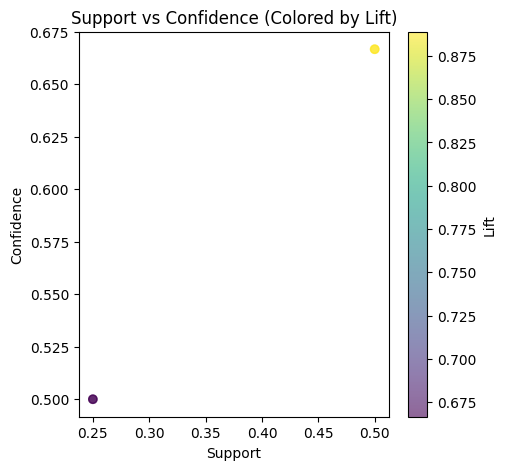

In [94]:
#Visualization
plt.figure(figsize=(5,5))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Support vs Confidence (Colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

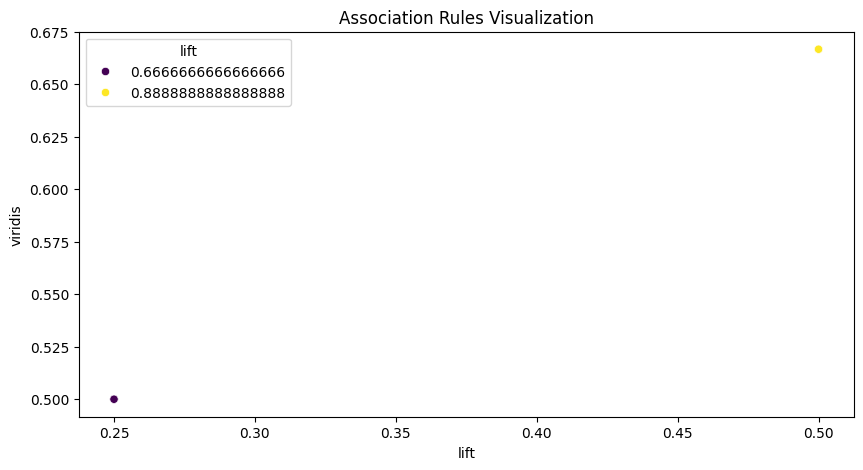

In [92]:
#Visualization of the rules
plt.figure(figsize=(10, 5))
sns.scatterplot(x='support', y='confidence', data=rules, hue='lift', palette='viridis')
plt.title('Association Rules Visualization')
plt.xlabel('lift')
plt.ylabel('viridis')
plt.show()

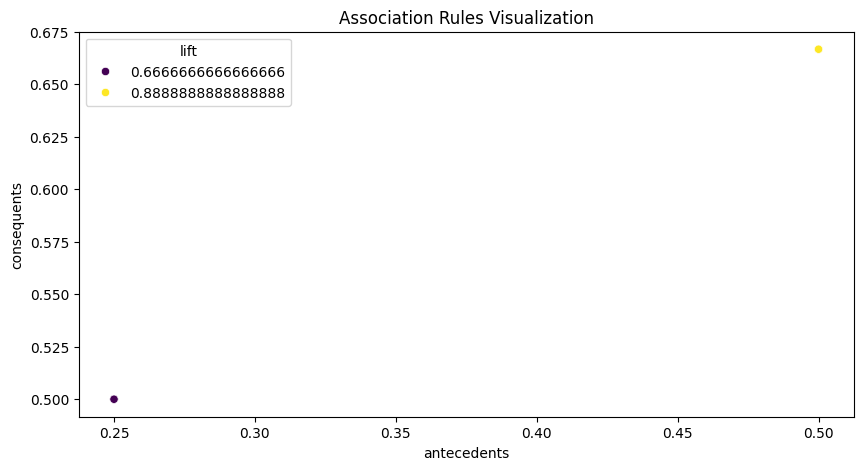

In [93]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='support', y='confidence', data=rules, hue='lift', palette='viridis')
plt.title('Association Rules Visualization')
plt.xlabel('antecedents')
plt.ylabel('consequents')
plt.show()

INTERVIEW QUESTIONS

1.Lift is important because it helps us evaluate the practical relevance of a rule. For example, a rule with high confidence might occur simply because the consequent is very common, but lift ensures we are finding meaningful relationships beyond chance. In market basket analysis, high lift values can help identify strong cross-selling opportunities or product bundles."

2.Support measures how frequently an item or itemset appears in the dataset. It is calculated as the proportion of transactions that contain the itemset.



Support = NO.of tranasction containing itemset X AND Y/total no.of transactin


Confidence measures the likelihood that the consequent will be purchased when the antecedent is purchased.
It indicates the strength of the implication



confidence =NO.of transaction containing both antecedent and consequent X AND Y /no.of transaction containing antecedent X

3.Association rule mining is a powerful technique for discovering relationships in data, but it does come with some limitations



1.Scalability
2.Threshold selection
3.Redundant rules
4.Rare itemsets
5.Lack of temporal context
6.Data preprocessing requirements